# Continuous Control

---


## 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


The environments corresponding to both versions of the environment can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
# env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


![Reacher](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/images/reacher.png?raw=true)

* Set-up: Double-jointed arm which can move to target locations.
* Goal: The agents must move its hand to the goal location, and keep it there.
* Agents: The environment contains 20 agents linked to a single brain.
* Agent Reward Function (independent):
  * +0.1 Each step agent's hand is in goal location.
* Brains: One Brain with the following observation/action space.
  * Vector Observation space: 33 variables corresponding to position, rotation,
    velocity, and angular velocities of the two arm Rigidbodies.
  * Vector Action space: (Continuous) Size of 4, corresponding to torque
    applicable to two joints. Every entry in the action vector should be a 
    number between -1 and 1.
  * Visual Observations: None.
* Reset Parameters: Five
  * goal_size: radius of the goal zone
    * Default: 5
    * Recommended Minimum: 1
    * Recommended Maximum: 10
  * goal_speed: speed of the goal zone around the arm (in radians)
    * Default: 1
    * Recommended Minimum: 0.2
    * Recommended Maximum: 4
  * gravity
    * Default: 9.81
    * Recommended Minimum: 4
    * Recommended Maximum: 20
  * deviation: Magnitude of sinusoidal (cosine) deviation of the goal along the vertical dimension
    * Default: 0
    * Recommended Minimum: 0
    * Recommended Maximum: 5
  * deviation_freq: Frequency of the cosine deviation of the goal along the vertical dimension
    * Default: 0
    * Recommended Minimum: 0
    * Recommended Maximum: 3
* Benchmark Mean Reward: 30

## 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

**Note:** you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to the environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.13649999694898723


## 4. Train the agents

The DDPG can be trained by calling the ddpg function defined bellow. Both agent and model classes are invoked from their respective helper files.

**Note:**
When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [6]:
from ddpg_agent import Agent
import random
import torch
from collections import deque
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [7]:
# initialize the agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=0)

#### Hyperparameters

The following hyperparameters were used to train the agents:
    - BUFFER_SIZE = int(1e6)       replay buffer size
    - BATCH_SIZE = 128             minibatch size
    - GAMMA = 0.99                 discount factor
    - TAU = 1e-3                   for soft update of target parameters
    - LR_ACTOR = 1e-4              learning rate of the actor 
    - LR_CRITIC = 3e-4             learning rate of the critic
    - WEIGHT_DECAY = 0             L2 weight decay
    - UPDATE_EVERY = 20            how often to update the network
    - UPDATE_NUM = 15              number of update passes
    - EPSILON = 1.0                starting value of epsilon
    - EPSILON_DECAY = 1e-6         factor for decreasing epsilon

### Deep Deterministic Policy Gradient (DDPG)

Deep Deterministic Policy Gradient (DDPG) is an algorithm which concurrently learns a Q-function and a policy. It uses off-policy data and the Bellman equation to learn the Q-function, and uses the Q-function to learn the policy.

This approach is closely connected to Q-learning, and is motivated the same way: if you know the optimal action-value function Q* (s,a), then in any given state, the optimal action a* (s) can be found by solving

![Optimal Action](https://spinningup.openai.com/en/latest/_images/math/ba36101c11fe8d42a8eb6367560792b6dc11a312.svg)

DDPG interleaves learning an approximator to Q* (s,a) with learning an approximator to a* (s), and it does so in a way which is specifically adapted for environments with continuous action spaces. But what does it mean that DDPG is adapted specifically for environments with continuous action spaces? It relates to how we compute the max over actions in max_a Q* (s,a).

When there are a finite number of discrete actions, the max poses no problem, because we can just compute the Q-values for each action separately and directly compare them. (This also immediately gives us the action which maximizes the Q-value.) But when the action space is continuous, we can’t exhaustively evaluate the space, and solving the optimization problem is highly non-trivial. Using a normal optimization algorithm would make calculating max_a Q* (s,a) a painfully expensive subroutine. And since it would need to be run every time the agent wants to take an action in the environment, this is unacceptable.

Because the action space is continuous, the function Q* (s,a) is presumed to be differentiable with respect to the action argument. This allows us to set up an efficient, gradient-based learning rule for a policy u(s) which exploits that fact. Then, instead of running an expensive optimization subroutine each time we wish to compute max_a Q(s,a), we can approximate it with max_a Q(s,a) Q(s,u(s)).

Credits to "OpenAI - Spinning Up"

#### Quick Facts

- DDPG is an off-policy algorithm.
- DDPG can only be used for environments with continuous action spaces.
- DDPG can be thought of as being deep Q-learning for continuous action spaces.

#### Pseudocode

![DDPG Pseudocode](https://spinningup.openai.com/en/latest/_images/math/66446594f760581068c5684f053e75f3de9b1404.svg)

In [8]:
def ddpg(n_episodes=1000, max_timestep=1000,
         actor_ckpt_path='actor_checkpoint.pth', critic_ckpt_path='critic_checkpoint.pth'):
    """Deep Deterministic Policy Gradient (DDPG)

    Params
    ======
        n_episodes (int)       : maximum number of training episodes
        max_timestep (int)     : maximum number of timesteps per episode
        actor_ckpt_path (str)  : directory to store actor network weights
        critic_ckpt_path (str) : directory to store critic network weights

    """
    mean_scores = []                     # initialize list for the mean scores from each episode
    min_scores = []                      # initialize list for the lowest scores from each episode
    max_scores = []                      # initialize list for the highest scores from each episode
    moving_avgs = []                     # initialize list for the moving averages of the episodes
    scores_window = deque(maxlen=100)    # initialize a container for the mean scores of the last 100 episodes
    best_score = -np.inf
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]   # reset the environment 
        states = env_info.vector_observations               # get the current state (for each agent)  
        scores = np.zeros(num_agents)                       # initialize the score (for each agent)
        agent.reset()
        for timestep in range(max_timestep):
            actions = agent.act(states)                     # select an action (for each agent, add_noise=True)
            env_info = env.step(actions)[brain_name]        # send actions to environment
            next_states = env_info.vector_observations      # get next state (for each agent)
            rewards = env_info.rewards                      # get reward (for each agent)
            dones = env_info.local_done                     # see if episode finished
            # save experience to replay buffer and perform learning step at defined interval
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, timestep)
            scores += rewards                               # update the score (for each agent)
            states = next_states                            # roll over states to next time step
            if np.any(dones):                               # exit loop if episode finished
                break

        mean_scores.append(np.mean(scores))                 # save mean score for the episode
        min_scores.append(np.min(scores))                   # save lowest score
        max_scores.append(np.max(scores))                   # save highest score
        scores_window.append(mean_scores[-1])               # save mean score to the 100 value window
        moving_avgs.append(np.mean(scores_window))          # save moving average
                
        print('\rEpisode {} : Average score - {:.2f} | Moving Average - {:.2f} | Min score - {:.2f} | Max score - {:.2f}'
              .format(i_episode, mean_scores[-1], moving_avgs[-1], min_scores[-1], max_scores[-1]))
                  
        if moving_avgs[-1] >= 30.0 and i_episode >= 100:
            print('\nEnvironment solved in {} episodes! Moving Average = {:.2f} over last 100 episodes'
                  .format(i_episode-100, moving_avgs[-1]))            
            torch.save(agent.actor_local.state_dict(), actor_ckpt_path)
            torch.save(agent.critic_local.state_dict(), critic_ckpt_path)  
            break
        
        if mean_scores[-1] > best_score:
            torch.save(agent.actor_local.state_dict(), actor_ckpt_path)
            torch.save(agent.critic_local.state_dict(), critic_ckpt_path)
            
        if i_episode == n_episodes:
            print('\nMaximum number {} of episodes reached! Moving Average = {:.2f} over the last 100 episodes'
                  .format(i_episode, moving_avgs[-1]))
            
    return mean_scores, moving_avgs

In [9]:
from workspace_utils import active_session

with active_session():  # used to keep Udacity's workspace awake during training
    # train the agent
    mean_scores, moving_avgs = ddpg()

Episode 1 : Average score - 1.57 | Moving Average - 1.57 | Min score - 0.31 | Max score - 4.40
Episode 2 : Average score - 3.66 | Moving Average - 2.62 | Min score - 2.05 | Max score - 4.79
Episode 3 : Average score - 4.08 | Moving Average - 3.11 | Min score - 2.22 | Max score - 7.28
Episode 4 : Average score - 5.85 | Moving Average - 3.79 | Min score - 3.94 | Max score - 7.76
Episode 5 : Average score - 6.80 | Moving Average - 4.39 | Min score - 3.60 | Max score - 9.89
Episode 6 : Average score - 7.62 | Moving Average - 4.93 | Min score - 4.70 | Max score - 12.00
Episode 7 : Average score - 8.01 | Moving Average - 5.37 | Min score - 5.81 | Max score - 12.90
Episode 8 : Average score - 11.00 | Moving Average - 6.07 | Min score - 7.20 | Max score - 15.75
Episode 9 : Average score - 15.25 | Moving Average - 7.09 | Min score - 11.18 | Max score - 20.53
Episode 10 : Average score - 17.71 | Moving Average - 8.16 | Min score - 12.05 | Max score - 22.97
Episode 11 : Average score - 20.20 | Mo

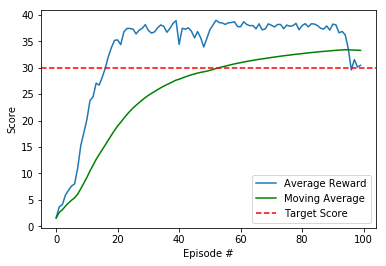

In [11]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(np.arange(len(mean_scores)), mean_scores, label='Average Reward')
plt.plot(np.arange(len(mean_scores)), moving_avgs, color='g', label='Moving Average')
plt.axhline(30, color="r", linestyle='dashed', label='Target Score')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend()
plt.show()

When finished, you can close the environment.

In [12]:
env.close()

## 5. Possible improvements

While DDPG can achieve great performance sometimes, it is frequently brittle with respect to hyperparameters and other kinds of tuning. Implementing other algorithms like Proximal Policy Optimization(PPO) and comparing the obtained results would give us a better picture of what algorithm is best suited for this particular environment.

Another thing that would definitely improve our model performance is hyperparameter tuning. We could optimize our model architecture(number of layers, hidden units, etc) and hyperperameters like:

- BUFFER_SIZE - replay buffer size
- BATCH_SIZE - minibatch size
- GAMMA - discount factor
- TAU - for soft update of target parameters
- LR_ACTOR - learning rate of the actor 
- LR_CRITIC - learning rate of the critic
- WEIGHT_DECAY - L2 weight decay
- UPDATE_EVERY - how often to update the network
- UPDATE_NUM - number of update passes
- EPSILON - starting value of epsilon
- EPSILON_DECAY - factor for decreasing epsilon